In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Open images

In [2]:
img_wide = cv2.imread("C:/Users/edmundo/Pictures/blog-featured_fruit-20180502.jpg")
img_tall = cv2.imread("C:/Users/edmundo/Pictures/random-bear-fact.jpg")

# Plot the original images
## Swap red and blue planes as opencv is bgr and matplotlib expects rgb

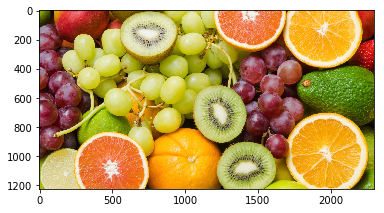

In [3]:
b_wide,g_wide,r_wide = cv2.split(img_wide)
orig_wide = cv2.merge([r_wide,g_wide,b_wide])
plt.imshow(orig_wide)

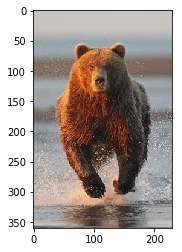

In [4]:
b_tall,g_tall,r_tall = cv2.split(img_tall)
orig_tall = cv2.merge([r_tall,g_tall,b_tall])
plt.imshow(orig_tall)

# Plot the green channel of image 1

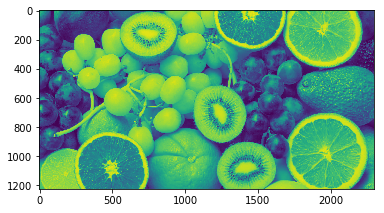

In [5]:
plt.imshow(g_wide)

# Plot the red channel of image 2

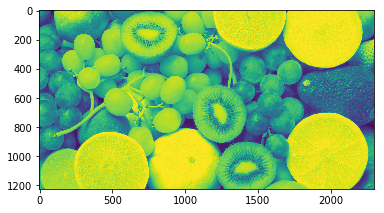

In [6]:
plt.imshow(r_wide)

# Select the approximate 100x100 center from image 1 green channel

(100, 100)


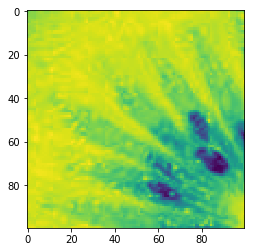

In [11]:
height, width = img_wide.shape[:2]
wide_center = (int(height/2), int(width/2))
img_wide_cropped = g_wide[wide_center[0]-50:wide_center[0]+50, wide_center[1]-50:wide_center[1]+50]
print(img_wide_cropped.shape)
plt.imshow(img_wide_cropped)

# Insert the last crop in the approximate center of image 2

In [12]:
height, width = img_tall.shape[:2]
tall_center = (int(height/2), int(width/2))

### This is the g channel monochrome image 2

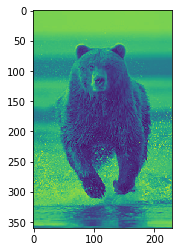

In [13]:
plt.imshow(g_tall)

### Replace the center 100x100 square for the crop of image 1

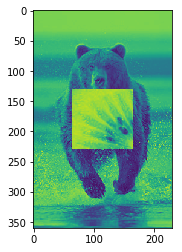

In [14]:
g_tall[tall_center[0]-50:tall_center[0]+50, tall_center[1]-50:tall_center[1]+50] = img_wide_cropped
plt.imshow(g_tall)

# Find absolute max and min of g_wide

In [19]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(g_wide)
print("Abs. min is: " + str(min_val) + " at " + str(min_loc))
print("Abs. max is: " + str(max_val) + " at " + str(max_loc))

Abs. min is: 0.0 at (2299, 170)
Abs. max is: 254.0 at (1467, 64)


# Compute Mean and Standard deviation

In [27]:
mean, std_dev = cv2.meanStdDev(g_wide)
print("Mean is: " + str(mean[0][0]))
print("Standard deviation is: " + str(std_dev[0][0]))

Mean is: 142.72758154392193
Standard deviation is: 66.34441930637792


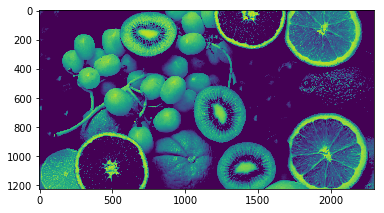

In [37]:
fourb = ((cv2.subtract(g_wide, mean))/std_dev) * 10
fourb = cv2.add(asd, mean)
plt.imshow(fourb)

# Shift g_wide to the left by 2 pixels using a filter

In [57]:
kernel = np.zeros((5,5), dtype=np.uint8)
kernel[2, 4] = 1
print(kernel)
g_wide_shifted = cv2.filter2D(g_wide, -1, kernel, borderType=1)

print(g_wide)
print(g_wide_shifted)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[160 166 173 ...  62  58  54]
 [162 167 172 ...  61  58  56]
 [164 167 168 ...  60  59  58]
 ...
 [173 173 173 ... 177 176 179]
 [173 173 173 ... 179 179 184]
 [173 173 173 ... 182 183 184]]
[[173 176 173 ...  54  54  54]
 [172 173 169 ...  56  56  56]
 [168 167 163 ...  58  58  58]
 ...
 [173 173 173 ... 179 179 179]
 [173 173 173 ... 184 184 184]
 [173 173 173 ... 184 184 184]]


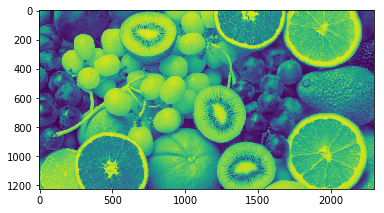

In [62]:
plt.imshow(g_wide_shifted)